In [65]:

from tensorflow.keras.datasets import mnist

# Step 1: Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


In [66]:
import os
import numpy as np
from tensorflow.keras.datasets import mnist

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Flatten the images (28x28 -> 784) for saving
x_train = x_train.reshape(x_train.shape[0], -1)  # Flatten training images
x_test = x_test.reshape(x_test.shape[0], -1)    # Flatten test images


save_dir = os.path.expanduser("~/data")  


np.save(os.path.join(save_dir, 'x_train.npy'), x_train)
np.save(os.path.join(save_dir, 'y_train.npy'), y_train)
np.save(os.path.join(save_dir, 'x_test.npy'), x_test)
np.save(os.path.join(save_dir, 'y_test.npy'), y_test)

print(f"MNIST dataset saved as .npy files in {save_dir}:")
print("x_train.npy, y_train.npy, x_test.npy, y_test.npy")

MNIST dataset saved as .npy files in /Users/swethagendlurnagarajan/data:
x_train.npy, y_train.npy, x_test.npy, y_test.npy


In [67]:
import numpy as np
import os

# Step 1: Load the saved .npy files
save_dir = os.path.expanduser("~/data")  
x_train = np.load(os.path.join(save_dir, 'x_train.npy'))
y_train = np.load(os.path.join(save_dir, 'y_train.npy'))
x_test = np.load(os.path.join(save_dir, 'x_test.npy'))
y_test = np.load(os.path.join(save_dir, 'y_test.npy'))

# Step 2: Normalize and flatten images
x_train_flat = x_train.astype("float32") / 255.0
x_test_flat = x_test.astype("float32") / 255.0

# Flatten each image (28x28 = 784)
x_train_flat = x_train_flat.reshape((x_train_flat.shape[0], -1))
x_test_flat = x_test_flat.reshape((x_test_flat.shape[0], -1))

print("Flattened training shape:", x_train_flat.shape)
print("Flattened test shape:", x_test_flat.shape)

Flattened training shape: (60000, 784)
Flattened test shape: (10000, 784)


In [69]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [70]:

import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a basic transform
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='/tmp', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='/tmp', train=False, download=True, transform=transform)

train_subset = [trainset[i] for i in range(1000)]
test_subset = [testset[i] for i in range(200)]

# Extract image data and labels
x_train = np.stack([np.array(img.permute(1, 2, 0)) * 255 for img, _ in train_subset]).astype(np.uint8)
y_train = np.array([label for _, label in train_subset])
x_test = np.stack([np.array(img.permute(1, 2, 0)) * 255 for img, _ in test_subset]).astype(np.uint8)
y_test = np.array([label for _, label in test_subset])

# Class names
class_names = trainset.classes


print("EDA Summary for MNIST (Subset)")

print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")
print(f"Image shape: {x_train.shape[1:]}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Classes: {class_names}")
print("Training label distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print("Test label distribution:")
print(pd.Series(y_test).value_counts().sort_index())
print(f"Pixel value range (train): min={x_train.min()}, max={x_train.max()}")


EDA Summary for MNIST (Subset)
Training set size: 1000
Test set size: 200
Image shape: (28, 28, 1)
Number of classes: 10
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Training label distribution:
0     97
1    116
2     99
3     93
4    105
5     92
6     94
7    117
8     87
9    100
dtype: int64
Test label distribution:
0    17
1    28
2    16
3    16
4    28
5    20
6    20
7    24
8    10
9    21
dtype: int64
Pixel value range (train): min=0, max=255


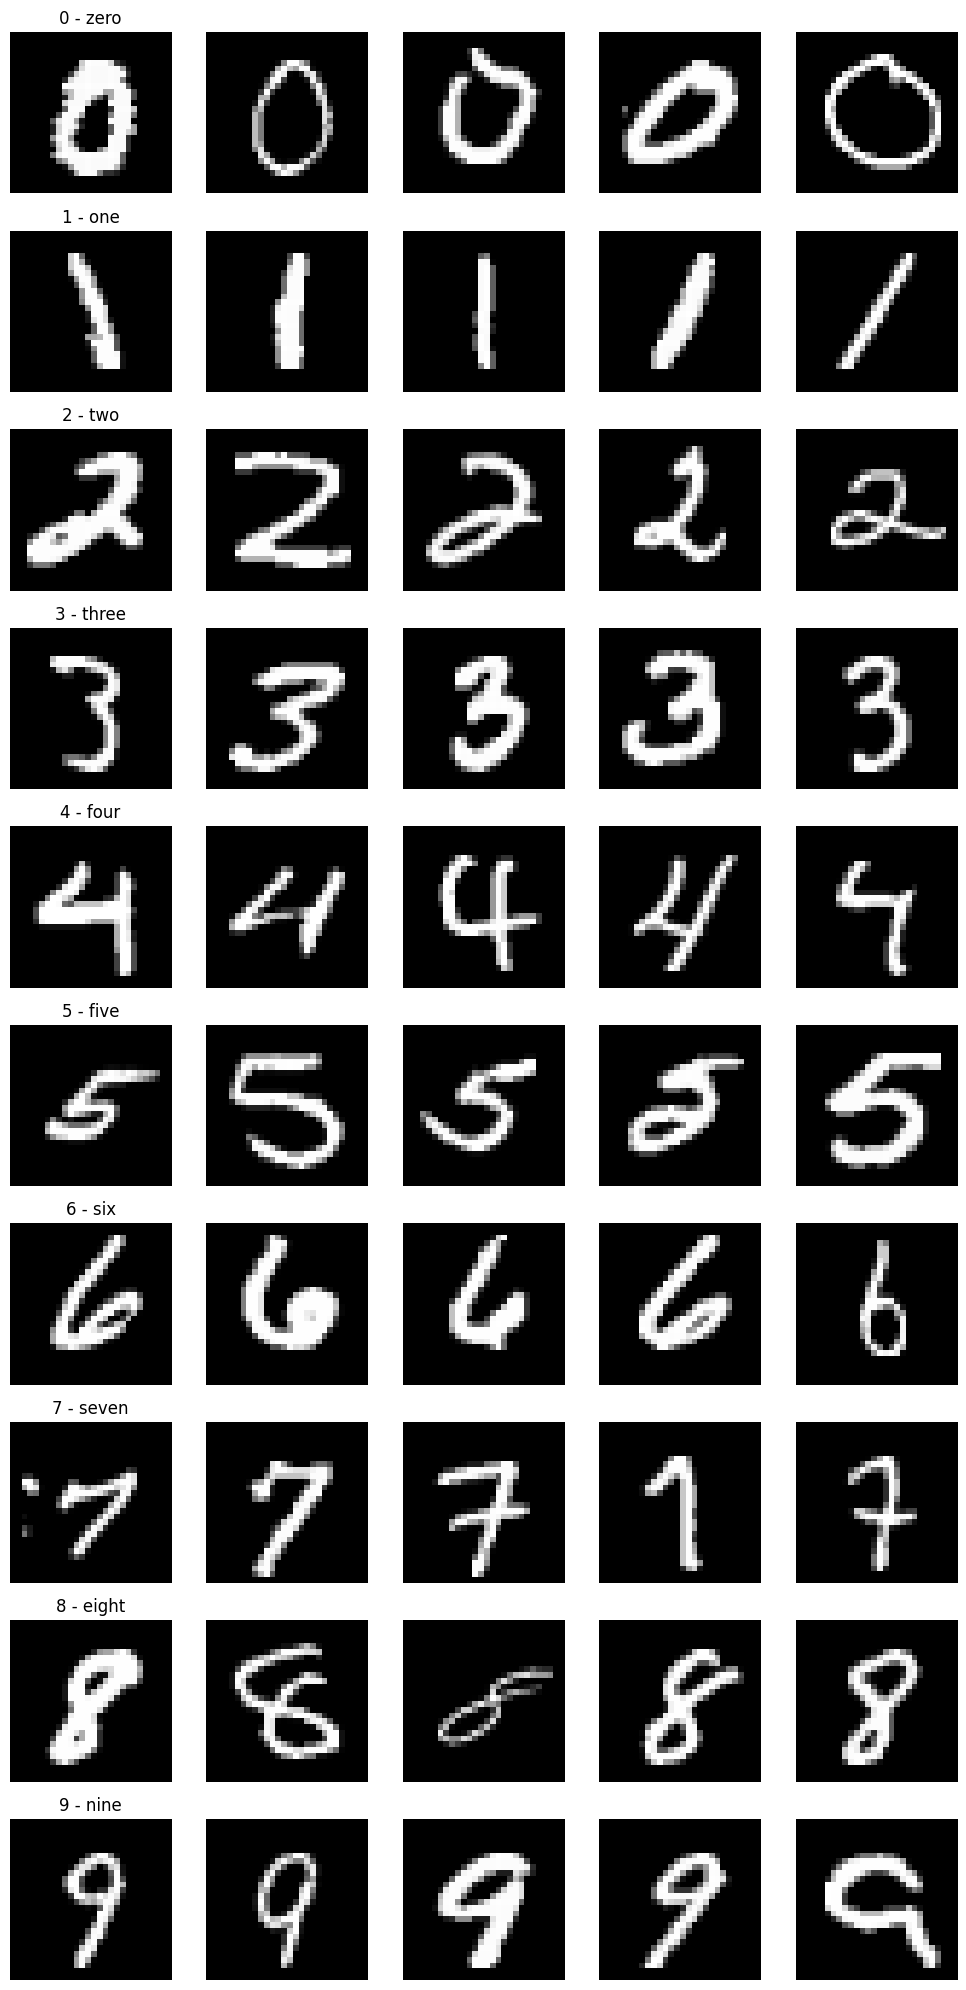

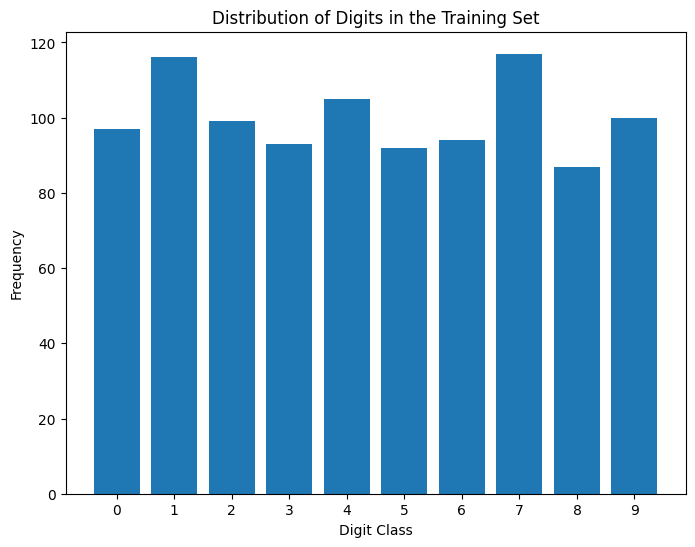

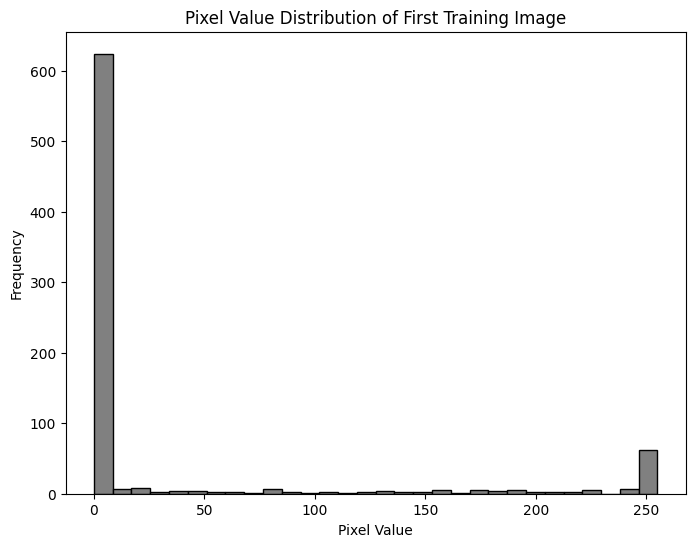

In [29]:
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a basic transform
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='/tmp', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='/tmp', train=False, download=True, transform=transform)

train_subset = [trainset[i] for i in range(1000)]
test_subset = [testset[i] for i in range(200)]

# Extract image data and labels
x_train = np.stack([np.array(img.permute(1, 2, 0)) * 255 for img, _ in train_subset]).astype(np.uint8)
y_train = np.array([label for _, label in train_subset])
x_test = np.stack([np.array(img.permute(1, 2, 0)) * 255 for img, _ in test_subset]).astype(np.uint8)
y_test = np.array([label for _, label in test_subset])

# Class names
class_names = trainset.classes

# 1. Sample images from each class (5 images per class)
def visualize_mnist_samples(X, y, class_names, samples_per_class=5):
    num_classes = len(class_names)
    plt.figure(figsize=(samples_per_class * 2, num_classes * 2))
    for cls_idx in range(num_classes):
        idxs = np.where(y == cls_idx)[0]
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(num_classes, samples_per_class, cls_idx * samples_per_class + i + 1)
            plt.imshow(X[idx], cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(class_names[cls_idx])
    plt.tight_layout()
    plt.show()

visualize_mnist_samples(x_train, y_train, class_names)

# 2. Distribution of labels in the training set (bar chart)
plt.figure(figsize=(8, 6))
plt.bar(np.unique(y_train), pd.Series(y_train).value_counts().sort_index())
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('Distribution of Digits in the Training Set')
plt.xticks(np.arange(10))
plt.show()

# 3. Pixel value histogram for the first training image
plt.figure(figsize=(8, 6))
plt.hist(x_train[0].flatten(), bins=30, color='gray', edgecolor='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution of First Training Image')
plt.show()


In [ ]:
import numpy as np, os
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import accuracy_score

# Load saved data
save_dir = os.path.expanduser("~/data")
X_train = np.load(os.path.join(save_dir, 'x_train.npy')).astype('float32') / 255.0
y_train = np.load(os.path.join(save_dir, 'y_train.npy'))
X_test  = np.load(os.path.join(save_dir, 'x_test.npy')).astype('float32')  / 255.0
y_test  = np.load(os.path.join(save_dir, 'y_test.npy'))


X_train = X_train.reshape((-1, 28, 28))
X_test  = X_test.reshape((-1, 28, 28))

# Split off 10% of training as validation
val_split = int(0.1 * len(X_train))
X_val, y_val = X_train[:val_split], y_train[:val_split]
X_tr,  y_tr  = X_train[val_split:], y_train[val_split:]


baseline = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
baseline.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train for 10 epochs
baseline_hist = baseline.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    verbose=2
)

# Evaluate on test set
preds = baseline.predict(X_test).argmax(axis=1)
test_acc = accuracy_score(y_test, preds)
print(f"Baseline Test Accuracy: {test_acc:.4f}")

Epoch 1/10


/Users/anaconda3/envs/aml/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/anaconda3/envs/aml/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


844/844 - 11s - 13ms/step - accuracy: 0.9117 - loss: 0.3136 - val_accuracy: 0.9527 - val_loss: 0.1634
Epoch 2/10
844/844 - 10s - 12ms/step - accuracy: 0.9575 - loss: 0.1471 - val_accuracy: 0.9637 - val_loss: 0.1197
Epoch 3/10
844/844 - 10s - 12ms/step - accuracy: 0.9697 - loss: 0.1043 - val_accuracy: 0.9672 - val_loss: 0.1043
Epoch 4/10
844/844 - 9s - 11ms/step - accuracy: 0.9772 - loss: 0.0775 - val_accuracy: 0.9685 - val_loss: 0.1057
Epoch 5/10
844/844 - 9s - 11ms/step - accuracy: 0.9815 - loss: 0.0622 - val_accuracy: 0.9730 - val_loss: 0.0852
Epoch 6/10
844/844 - 9s - 11ms/step - accuracy: 0.9853 - loss: 0.0493 - val_accuracy: 0.9767 - val_loss: 0.0788
Epoch 7/10
844/844 - 9s - 11ms/step - accuracy: 0.9879 - loss: 0.0407 - val_accuracy: 0.9752 - val_loss: 0.0781
Epoch 8/10
844/844 - 9s - 11ms/step - accuracy: 0.9906 - loss: 0.0324 - val_accuracy: 0.9730 - val_loss: 0.0861
Epoch 9/10
844/844 - 9s - 11ms/step - accuracy: 0.9925 - loss: 0.0260 - val_accuracy: 0.9738 - val_loss: 0.0838


In [ ]:
import kerastuner as kt
import time
from sklearn.metrics import f1_score, confusion_matrix

# Define builder

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    for i in range(hp.Int('n_layers', 1, 3)):
        units = hp.Choice(f'units_{i}', [128,256,512])
        act = hp.Choice('activation', ['relu','elu','leaky_relu'])
        model.add(keras.layers.Dense(units, activation=act))
        if hp.Float('dropout', 0.0, 0.5, step=0.1) > 0:
            model.add(keras.layers.Dropout(hp.Float('dropout', 0.0, 0.5, step=0.1)))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam','rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Run tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='ann_tuner',
    project_name='mnist_ann'
)


tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,  
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=2
)

# Retrieve best model and metrics
top_model = tuner.get_best_models(num_models=1)[0]
start = time.time()
history = top_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=2
)
train_time = time.time() - start

y_preds = top_model.predict(X_test).argmax(axis=1)
f1 = f1_score(y_test, y_preds, average='macro')
cm = confusion_matrix(y_test, y_preds)

Trial 5 Complete [00h 03m 27s]
val_accuracy: 0.9941666722297668

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 15m 47s
Epoch 1/20


/Users/anaconda3/envs/aml/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


938/938 - 8s - 9ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9997 - val_loss: 0.0016
Epoch 2/20
938/938 - 8s - 9ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 9.7706e-04
Epoch 3/20
938/938 - 8s - 8ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9998 - val_loss: 9.0995e-04
Epoch 4/20
938/938 - 8s - 9ms/step - accuracy: 0.9999 - loss: 7.9990e-04 - val_accuracy: 0.9998 - val_loss: 5.2368e-04
Epoch 5/20
938/938 - 8s - 9ms/step - accuracy: 0.9999 - loss: 5.6522e-04 - val_accuracy: 0.9998 - val_loss: 5.7589e-04
Epoch 6/20
938/938 - 8s - 9ms/step - accuracy: 0.9999 - loss: 4.2350e-04 - val_accuracy: 1.0000 - val_loss: 2.5605e-04
Epoch 7/20
938/938 - 8s - 9ms/step - accuracy: 1.0000 - loss: 3.0161e-04 - val_accuracy: 1.0000 - val_loss: 2.8890e-04
Epoch 8/20
938/938 - 8s - 9ms/step - accuracy: 1.0000 - loss: 2.5922e-04 - val_accuracy: 1.0000 - val_loss: 2.1215e-04
Epoch 9/20
938/938 - 8s - 9ms/step - accuracy: 1.0000 - loss: 1.9668e-04 - 

In [77]:
baseline.save("ann_mnist.h5")

In [78]:
model.save("tuned_ann_mnist.h5")

In [ ]:
# gradio_app.py
import os
import numpy as np
import tensorflow as tf
import gradio as gr
import matplotlib.pyplot as plt

# Load model and test data
model = tf.keras.models.load_model("ann_mnist.h5")
save_dir = os.path.expanduser("~/data")
X_test = np.load(os.path.join(save_dir, 'x_test.npy')).reshape(-1,28,28).astype('float32')/255.0
y_test = np.load(os.path.join(save_dir, 'y_test.npy'))

def predict(img, idx):
    # img: numpy array or None
    if img is None:
        img_arr = X_test[int(idx)]
        true_label = int(y_test[int(idx)])
    else:
        arr = img.astype('float32')
        
        if arr.ndim == 3:
            arr = arr.mean(axis=2)
        img_arr = tf.image.resize_with_pad(arr[..., None], 28, 28).numpy().squeeze()
        true_label = None
    # Prediction
    probs = model.predict(img_arr.reshape(1,28,28), verbose=0)[0]
    pred = int(np.argmax(probs))
    # Visualization: image + bar chart
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    axes[0].imshow(img_arr, cmap='gray'); axes[0].axis('off')
    title = f"Pred→{pred}"
    if true_label is not None:
        title += f" (True:{true_label})"
    axes[0].set_title(title)
    axes[1].bar(range(10), probs)
    axes[1].set_xticks(range(10)); axes[1].set_ylim(0,1)
    axes[1].set_title("Class probabilities")
    plt.tight_layout()
    top3 = {str(i): float(probs[i]) for i in np.argsort(probs)[-3:][::-1]}
    return pred, top3, fig

with gr.Blocks() as demo:
    gr.Markdown("## MNIST Digit Classifier")
    with gr.Row():
        img_input = gr.Image(type='numpy', label='Upload a digit (28×28)')
        idx_slider = gr.Slider(0, len(X_test)-1, value=0, step=1, label='Or pick test sample')
    pred_out = gr.Label(label='Predicted Digit')
    probs_out = gr.Label(num_top_classes=3, label='Top‑3 Probabilities')
    vis_out   = gr.Plot(label='Visualization')

    img_input.change(lambda img, idx: predict(img, idx), [img_input, idx_slider], [pred_out, probs_out, vis_out])
    idx_slider.change(lambda img, idx: predict(img, idx), [img_input, idx_slider], [pred_out, probs_out, vis_out])

if __name__ == '__main__':
    demo.launch()

* Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


/Users/anaconda3/envs/aml/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/Users/anaconda3/envs/aml/lib/python3.12/site-packages/gradio/blocks.py:1855: UserWarning: A function returned too many output values (needed: 3, returned: 4). Ignoring extra values.
    Output components:
        [label, label, plot]
    Output values returned:
        [0, {'0': 0.9999992847442627, '9': 3.6765044342246256e-07, '5': 3.548435358879942e-07}, Figure(600x300), [array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],